In [4]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


In [21]:
import sympy as sp
import numpy as np
from sympy.abc import xi  # así tengo letras griegas
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib ipympl

In [22]:
#Queremos hacer un filtro pasa bajos, donde estén todas las variables definidas menos la selectividad
w_o = sp.symbols('w_o', real = True)
s = sp.symbols('s', complex = True)

In [23]:
num = 1
den = s**2/((w_o)**2) + s*xi/w_o + 1
display(num)
display(den)

H_transfer = num/den
display(H_transfer)

1

s**2/w_o**2 + s*xi/w_o + 1

1/(s**2/w_o**2 + s*xi/w_o + 1)

In [24]:
#Para no realizar subs, hay otra forma de poder reemplazar la selectividad xi

H_transfer = sp.Lambda(xi,H_transfer)
display(H_transfer)
display(H_transfer(0.6))


Lambda(xi, 1/(s**2/w_o**2 + s*xi/w_o + 1))

1/(s**2/w_o**2 + 0.6*s/w_o + 1)

sympy.core.mul.Mul

(100, 100)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

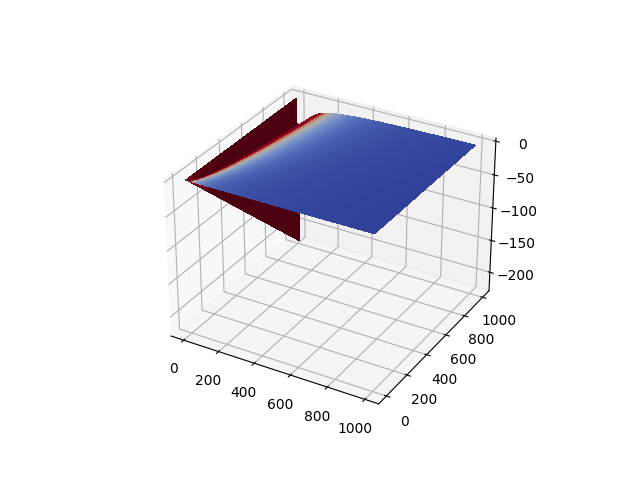

In [67]:
k1, k2, r1, r2 = sp.symbols('K_1, K_2, R_1, R_2', real= True)


Hv = k2 * ( (r1*k1)*(r2)/((r1*k1)+(r2)) ) / ( ( (r1*k1)*(r2)/((r1*k1)+(r2)) ) + (r1*(1-k1)) )

display( type(Hv) )

Hv_L = sp.lambdify((k1, k2, r1, r2),Hv)

k1=np.linspace(0,1000,100)
k2=np.linspace(0,1000,100)

k1,k2=np.meshgrid(k1,k2)

Hv_L = Hv_L(k1,k2,5e3,10e3)


gradient = np.gradient(Hv_L)
modGrad = np.sqrt(gradient[0]**2 + gradient[1]**2)
N_grad = modGrad/modGrad.max()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
cmap = cm.coolwarm(modGrad)


display(N_grad.shape)


surf = ax.plot_surface(k1, k2, Hv_L, rstride=1, cstride=1, linewidth=0, facecolors=cmap, antialiased=False)
